# Principal Components Analysis for Dimensionality Reduction
##### Create and test regression model before and after dimensionality reduction

In [1]:
import pandas as pd
import numpy as np

### Download the Wine data set

<b>Download link: </b>https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

<b>Summary:</b> Given 11 features representing information about a number of white wines, predict its quality score

<b>Notes:</b>
* The file comes with headers, but we specify them explicitly to be in our desired format
* Since we're using our own headers, we skip the first row of the csv file which has the header


In [2]:
wine_data = pd.read_csv('./datasets/winequality-white.csv', 
                        names=['Fixed Acidity', 
                               'Volatile Acidity', 
                               'Citric Acid', 
                               'Residual Sugar', 
                               'Chlorides', 
                               'Free Sulfur Dioxide', 
                               'Total Sulfur Dioxide', 
                               'Density', 
                               'pH', 
                               'Sulphates', 
                               'Alcohol', 
                               'Quality'
                              ],
                        skiprows=1,
                        sep=r'\s*;\s*', engine='python')
wine_data.head()

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Fixed Acidity         4898 non-null   float64
 1   Volatile Acidity      4898 non-null   float64
 2   Citric Acid           4898 non-null   float64
 3   Residual Sugar        4898 non-null   float64
 4   Chlorides             4898 non-null   float64
 5   Free Sulfur Dioxide   4898 non-null   float64
 6   Total Sulfur Dioxide  4898 non-null   float64
 7   Density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   Sulphates             4898 non-null   float64
 10  Alcohol               4898 non-null   float64
 11  Quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


#### 7 Unique values. So wild guesses will be right about 14% of the time

In [4]:
wine_data['Quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

### Define training and test data
Since all the data is already numeric, no conversions are necessary

In [5]:
X = wine_data.drop('Quality', axis=1)
Y = wine_data['Quality']

from sklearn import preprocessing
X = preprocessing.scale(X)

from sklearn.model_selection import train_test_split

X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

### Define the benchmark SVM Classifier
We check how our model works with all the features without any transformations

In [6]:
from sklearn.svm import LinearSVC

clf_svc = LinearSVC(penalty='l1', dual=False, tol=1e-3)

clf_svc.fit(X_train, Y_train)
clf_svc.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'loss': 'squared_hinge',
 'max_iter': 1000,
 'multi_class': 'ovr',
 'penalty': 'l1',
 'random_state': None,
 'tol': 0.001,
 'verbose': 0}

#### Check the accuracy of the model

In [7]:
accuracy = clf_svc.score(x_test, y_test)
print(accuracy)

0.4928571428571429


#### Plot a heatmap displaying the correlation between features

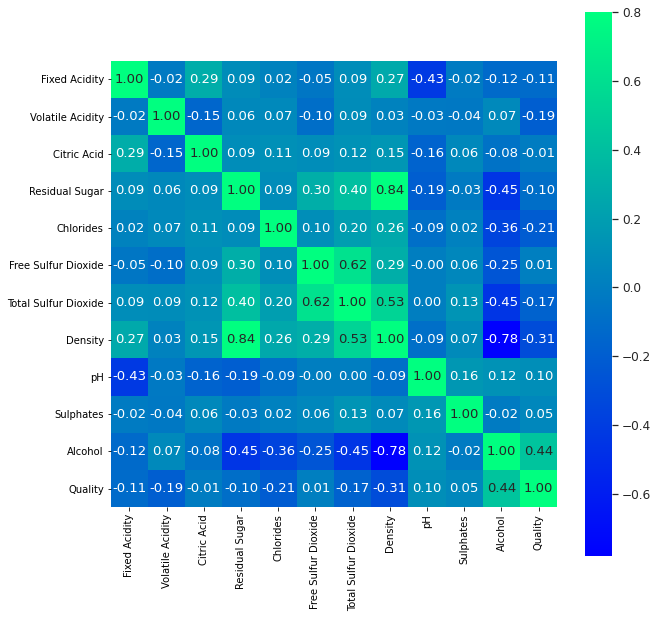

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

corrmat = wine_data.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.set(font_scale=1.1)
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, fmt='.2f', cmap = "winter")
plt.show()

### Use PCA for dimensionality reduction
* <b>n_components: </b>Sets the number of dimensions
* <b>whiten: </b>Before projecting the data to the principal components, the data will be normalized so that they have close to identity covariance. This has the effect of preventing one factor which has a high variance from being given too much importance

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1, whiten=True)
X_reduced = pca.fit_transform(X)

In [10]:
X_reduced.shape

(4898, 1)

#### View the eigen values of each principal component in decreasing order

In [11]:
pca.explained_variance_

array([3.2229119])

#### Eigen values expressed as a ratio

In [12]:
pca.explained_variance_ratio_

array([0.29293217])

#### Generating a Scree Plot
Can be used to visualize the Explained Variance and eliminate 

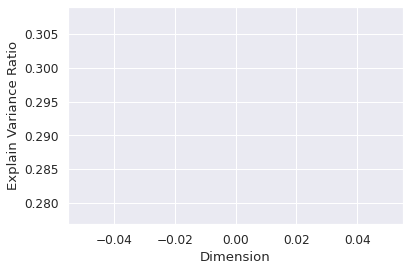

In [13]:
import matplotlib.pyplot as plt
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Dimension')
plt.ylabel('Explain Variance Ratio')
plt.show()

In [14]:
X_train, x_test, Y_train, y_test = train_test_split(X_reduced, Y, test_size=0.2, random_state=0)
clf_svc_pca = LinearSVC(penalty='l1', dual=False, tol=1e-3)
clf_svc_pca.fit(X_train, Y_train)
print(clf_svc_pca.get_params())


accuracy = clf_svc_pca.score(x_test, y_test)
print(accuracy)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l1', 'random_state': None, 'tol': 0.001, 'verbose': 0}
0.44081632653061226
